In [2]:
import pandas as pd
import numpy as np
import glob
import os
import csv
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams.update({'font.size': 16})

In [3]:
path_to_evaluationFiles = '..\\experiments\\artificial\\evaluation\\'

In [4]:
def get_coefDet(cluster_alg = 'DBSCAN', noise='', eps='', dist ='', threshold=''):
    
    #df_coefDet = pd.read_csv(path_to_evaluationFiles + 'coef_of_determination.csv')
    df_coefDet = pd.read_csv(path_to_evaluationFiles + 'cod.csv')

    if noise != '':
        df_coefDet= df_coefDet[(df_coefDet['Noise']== noise)]#  | (df['Noise']== 0.4) | (df['Noise']== 0.6)]  
    
    if eps != '':
        df_coefDet= df_coefDet[(df_coefDet['Eps']== eps)]
        
    if dist != '':
        df_coefDet = df_coefDet[df_coefDet['type B CorrCoef'] == dist]
    
    if threshold != '':
        df_coefDet = df_coefDet[df_coefDet['Threshold'] == threshold] 
    #df= df[df['Filename'].str.endswith('_5')]

    #if cluster alg is empty, then use entire data set
    if cluster_alg != '':
        df_coefDet = df_coefDet[df_coefDet['Cluster Alg'] == cluster_alg]
    return df_coefDet

In [5]:
def get_mean(filename, group_by, cluster_alg = '', noise='', eps='', dist ='', threshold=''):
    df = pd.read_csv(filename)
    if noise != '':
        df= df[(df['Noise']== noise)]#  | (df['Noise']== 0.4) | (df['Noise']== 0.6)]  
    
    if eps != '':
        df= df[(df['Eps']== eps)]
        
    if dist != '':
        df = df[df['type B CorrCoef'] == dist]
    
    if threshold != '':
        df = df[df['Threshold'] == threshold] 
    #df= df[df['Filename'].str.endswith('_5')]

    #if cluster alg is empty, then use entire data set
    if cluster_alg != '':
        df = df[df['Cluster Alg'] == cluster_alg]
    if group_by != '':
        return df.groupby(group_by, as_index=False).mean()
    return df

In [6]:
def get_dfs(group_by, type, cluster_alg='DBSCAN', noise='', eps='', dist ='', threshold=''):
    df_f1 = get_mean(path_to_evaluationFiles + 'f1' + type + '.csv', group_by, cluster_alg, noise=noise, eps=eps, dist =dist, threshold=threshold).round(2)
    df_rec = get_mean(path_to_evaluationFiles + 'rec'+ type + '.csv', group_by, cluster_alg, noise=noise, eps=eps, dist =dist, threshold=threshold).round(2)
    df_prec = get_mean(path_to_evaluationFiles + 'prec'+ type + '.csv', group_by, cluster_alg, noise=noise, eps=eps, dist =dist, threshold=threshold).round(2)
    
    return df_f1, df_rec, df_prec

In [7]:
def get_graph(df, var, ylabel='', xlabel='', ylim = (0.6, 0.95) , xlim ='', xticks = '', competitors = False, df_comp = None, kind='line', legend = False):
    plt.gcf().clear()

    if kind == 'bar':
        df[['Weighted OffstreamRatio', 'OffstreamRatio', 'OffstreamRatio2X']].plot(x = df[var], 
                                                                               kind=kind, 
                                                                               color = ('#19526E', '0.5', '0.7'), legend=False)
    else:
        #plt.plot( var, 'Weighted Noffstream', data=df, color='#19526E')
        #plt.plot( var, 'Noffstream', data=df, color='#19526E', linestyle = '--')
        plt.plot( var, 'Weighted OffstreamRatio', data=df,  color='#19526E')
        plt.plot( var, 'OffstreamRatio', data=df, color='#19526E', linestyle = '--')
        plt.plot( var, 'OffstreamRatio2X', data=df, color='0.5', linestyle = '--')
        if competitors:
            plt.plot(df_comp.index, 'ChenMax', data = df_comp, color='#992323')
            plt.plot(df_comp.index, 'ChenMean', data = df_comp, color='#c17b7b')
            plt.plot(df_comp.index, 'ChenSum', data = df_comp, color='#E0BDBD')
            #plt.plot(df_comp.index, 'corrnorm', data =df_comp, color='#3999dc')
        
    
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    if legend:
        plt.legend()
#   plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.ylim(ylim)
    if xlim != '':
        plt.xlim(xlim)
    if xticks != '':
        plt.xticks(xticks)
    return plt
    

In [8]:
def get_graph_B(df, var, ylabel = '', xlabel='', ylim = (0.45, 0.75) , xticks = '', kind = 'line', competitor = pd.DataFrame(), hline = ''):
    plt.gcf().clear()
    
    # Get current size
    fig_size = plt.rcParams["figure.figsize"]

    # Set figure width to 12 and height to 9
    #fig_size[0] = 12
    #fig_size[1] = 6
    #plt.rcParams["figure.figsize"] = fig_size

    plt.plot( var, 'Inter-Cluster-Change', data=df, color='#19526E')
    #plt.plot( var, 'Weighted Inter-Cluster-Change', data=df, color='#19526E', linestyle = '--')
    plt.plot( var, 'Survivor-Distance-Change', data=df, color='0.5')
    plt.plot( var, 'Weighted Survivor-Distance-Change', data=df, color='0.5', linestyle = '--')
    
    if not competitor.empty:
        plt.plot( var, 'corrnorm', data=competitor, color='red')
    
    if hline != '':
        plt.hlines(hline[0], hline[1],hline[2], colors = 'r')
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    #plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.ylim(ylim)
    if xticks != '':
        plt.xticks(xticks)
    return plt
    

<h3>Get competitors</h3>

In [10]:
df_f1, df_rec, df_prec = get_dfs('','A')
columns = df_f1.columns[8:20].tolist()
columns.extend(['Cluster Alg', 'Eps'])

In [11]:
df_f1, df_rec, df_prec = get_dfs('','A')
competitor_f1A = df_f1.drop(columns, axis=1).drop_duplicates()
competitor_recA = df_rec.drop(columns, axis=1).drop_duplicates()
competitor_precA = df_prec.drop(columns, axis=1).drop_duplicates()

In [12]:
df_f1, df_rec, df_prec = get_dfs('','B')
competitor_f1B = df_f1.drop(columns, axis=1).drop_duplicates()
competitor_recB = df_rec.drop(columns, axis=1).drop_duplicates()
competitor_precB = df_prec.drop(columns, axis=1).drop_duplicates()

In [13]:
df_f1, df_rec, df_prec = get_dfs('','ALL')
competitor_f1ALL = df_f1.drop(columns, axis=1).drop_duplicates()
competitor_recALL = df_rec.drop(columns, axis=1).drop_duplicates()
competitor_precALL = df_prec.drop(columns, axis=1).drop_duplicates()

In [14]:
competitor_coefDet = get_coefDet().drop(columns, axis=1).drop_duplicates()

<h2>Overview</h2>

In [15]:
order = ['Inter-Cluster Distance', 'Weighted Inter-Cluster Distance', 'Inter-Cluster-Change','Survivor-Distance-Change', 'Weighted Survivor-Distance-Change', 'Weighted Noffstream', 'Weighted OffstreamRatio', 'Noffstream', 'OffstreamRatio', 'OffstreamRatio2X', 'ChenMax', 'ChenMean', 'ChenSum', 'corrnorm']

<Figure size 432x288 with 0 Axes>

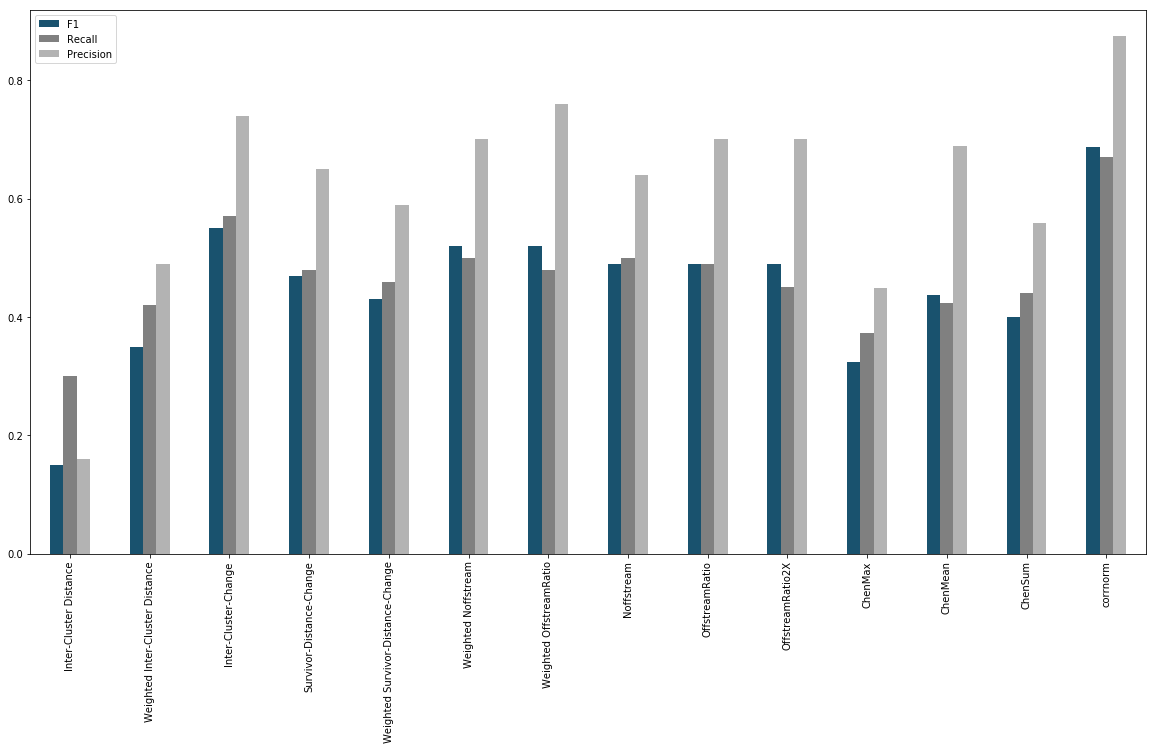

In [17]:
df_f1, df_rec, df_prec= get_dfs('', 'ALL',cluster_alg='')
df_overview = pd.DataFrame()
df_overview['F1'] = df_f1.iloc[:,9:20].mean().round(2).append(competitor_f1ALL.iloc[:,6:].mean(axis=0))
df_overview['Recall'] = df_rec.iloc[:,9:20].mean().round(2).append(competitor_recALL.iloc[:,6:].mean(axis=0))
df_overview['Precision'] = df_prec.iloc[:,9:20].mean().round(2).append(competitor_precALL.iloc[:,6:].mean(axis=0))
df_overview.drop('Weighted Inter-Cluster-Change', inplace=True)
df_overview = df_overview.loc[order,:]

fig = plt.figure()
df_overview.plot(kind='bar', figsize=(20,10), color=('#19526E','0.5','0.7')).get_figure().savefig('graphs/overviewALL', bbox_inches='tight')

In [18]:
df_overview

,F1,Recall,Precision
Inter-Cluster Distance,0.150000,0.300000,0.160000
Weighted Inter-Cluster Distance,0.350000,0.420000,0.490000
Inter-Cluster-Change,0.550000,0.570000,0.740000
Survivor-Distance-Change,0.470000,0.480000,0.650000
Weighted Survivor-Distance-Change,0.430000,0.460000,0.590000
Weighted Noffstream,0.520000,0.500000,0.700000
Weighted OffstreamRatio,0.520000,0.480000,0.760000
Noffstream,0.490000,0.500000,0.640000
OffstreamRatio,0.490000,0.490000,0.700000
OffstreamRatio2X,0.490000,0.450000,0.700000


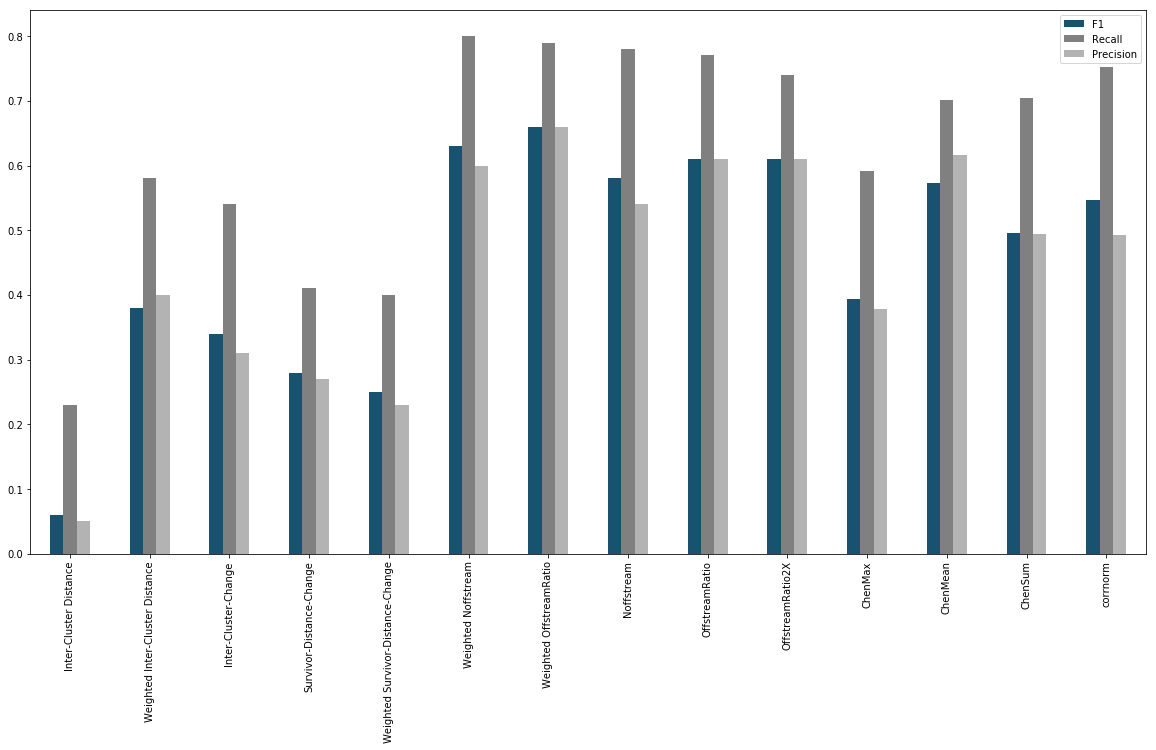

In [19]:
df_f1, df_rec, df_prec= get_dfs('', 'A', cluster_alg='')
df_overview = pd.DataFrame()
df_overview['F1'] = df_f1.iloc[:,9:20].mean().round(2).append(competitor_f1A.iloc[:,6:].mean(axis=0))
df_overview['Recall'] = df_rec.iloc[:,9:20].mean().round(2).append(competitor_recA.iloc[:,6:].mean(axis=0))
df_overview['Precision'] = df_prec.iloc[:,9:20].mean().round(2).append(competitor_precA.iloc[:,6:].mean(axis=0))

df_overview.drop('Weighted Inter-Cluster-Change', inplace=True)
df_overview = df_overview.loc[order,:]
df_overview.plot(kind='bar', figsize=(20,10), color=('#19526E','0.5','0.7')).get_figure().savefig('graphs/overviewA', bbox_inches='tight')

In [20]:
df_overview

,F1,Recall,Precision
Inter-Cluster Distance,0.060000,0.230000,0.050000
Weighted Inter-Cluster Distance,0.380000,0.580000,0.400000
Inter-Cluster-Change,0.340000,0.540000,0.310000
Survivor-Distance-Change,0.280000,0.410000,0.270000
Weighted Survivor-Distance-Change,0.250000,0.400000,0.230000
Weighted Noffstream,0.630000,0.800000,0.600000
Weighted OffstreamRatio,0.660000,0.790000,0.660000
Noffstream,0.580000,0.780000,0.540000
OffstreamRatio,0.610000,0.770000,0.610000
OffstreamRatio2X,0.610000,0.740000,0.610000


<Figure size 432x288 with 0 Axes>

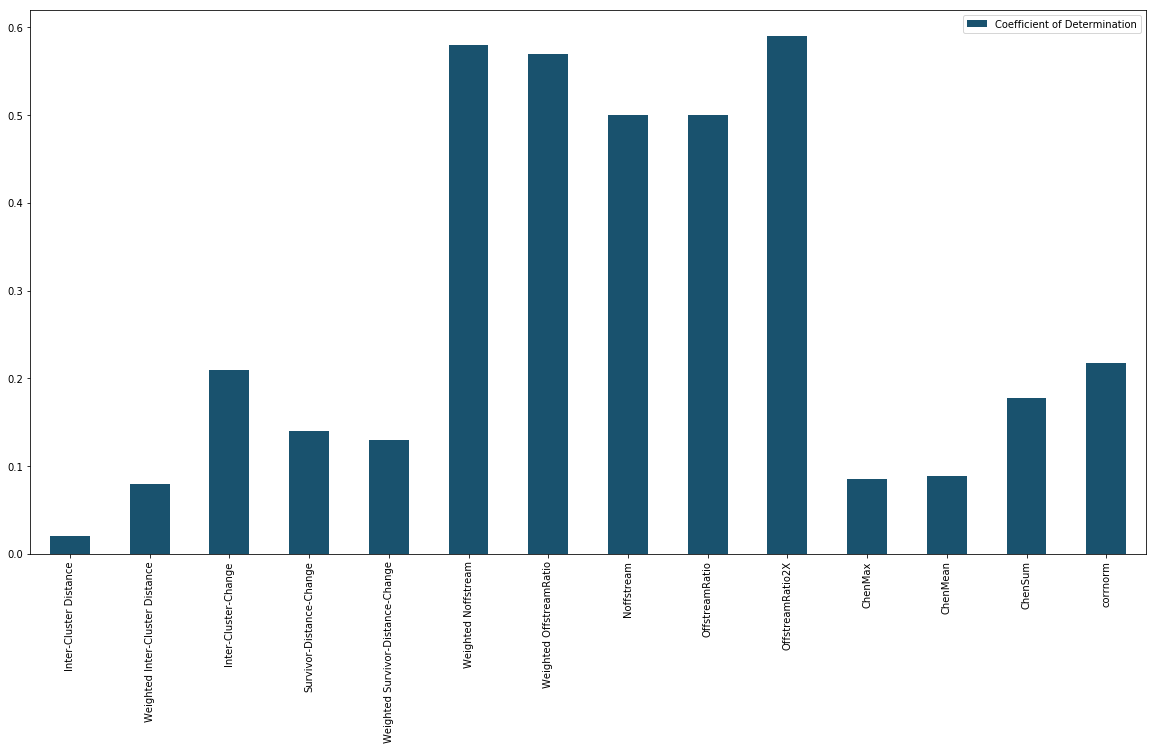

In [21]:
df_overview = pd.DataFrame()
df_overview['Coefficient of Determination'] = get_coefDet(cluster_alg='').iloc[:,9:20].mean().round(2).append(competitor_coefDet.iloc[:,6:].mean(axis=0))

fig = plt.figure()
df_overview.drop('Weighted Inter-Cluster-Change', inplace=True)
df_overview = df_overview.loc[order,:]
df_overview.plot(kind='bar', figsize=(20,10), color=('#19526E')).get_figure().savefig('graphs/coefDetALL', bbox_inches='tight')

In [22]:
df_overview

,Coefficient of Determination
Inter-Cluster Distance,0.020000
Weighted Inter-Cluster Distance,0.080000
Inter-Cluster-Change,0.210000
Survivor-Distance-Change,0.140000
Weighted Survivor-Distance-Change,0.130000
Weighted Noffstream,0.580000
Weighted OffstreamRatio,0.570000
Noffstream,0.500000
OffstreamRatio,0.500000
OffstreamRatio2X,0.590000


In [24]:
df_overview

Noffstream                 0.50
Weighted Noffstream        0.58
OffstreamRatio             0.50
OffstreamRatio2X           0.59
Weighted OffstreamRatio    0.57
dtype: float64

c:\users\alexa\appdata\local\conda\conda\envs\thesis\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  
c:\users\alexa\appdata\local\conda\conda\envs\thesis\lib\site-packages\pandas\core\indexing.py:1367: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


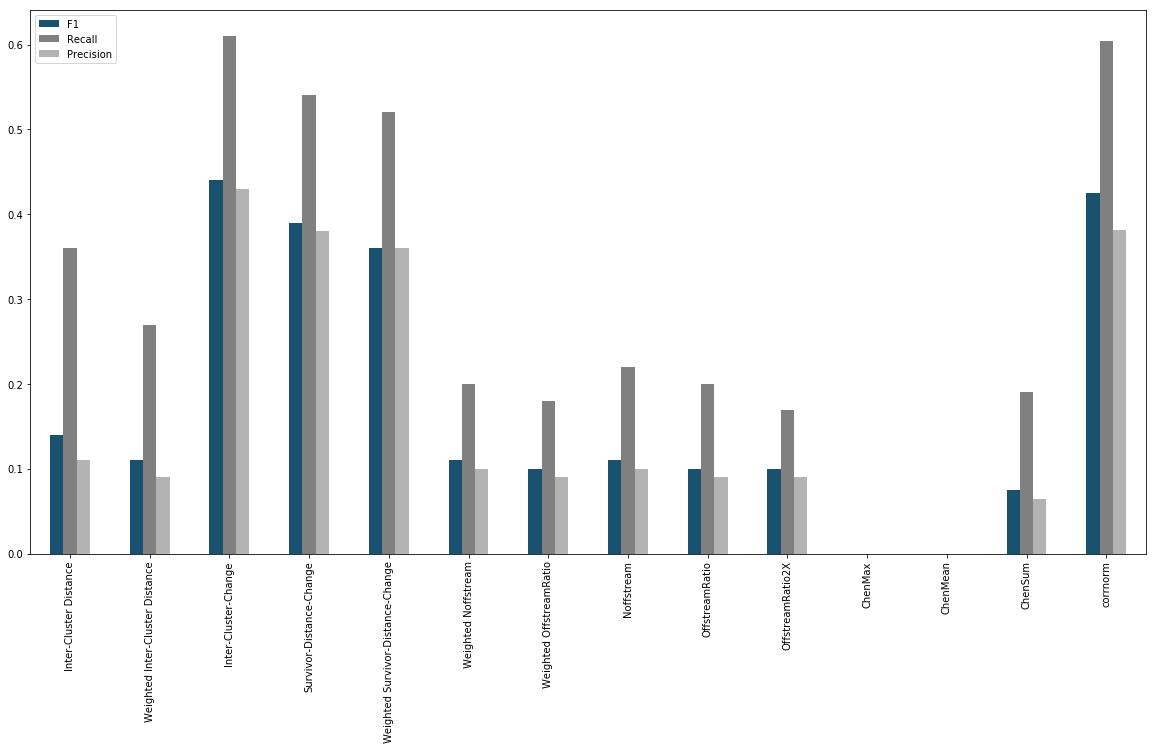

In [25]:
df_f1, df_rec, df_prec= get_dfs('', 'B', cluster_alg='')
df_overview = pd.DataFrame()
df_overview['F1'] = df_f1.iloc[:,8:20].mean().round(2).append(competitor_f1B.iloc[:,8:].mean(axis=0))
df_overview['Recall'] = df_rec.iloc[:,8:20].mean().round(2).append(competitor_recB.iloc[:,8:].mean(axis=0))
df_overview['Precision'] = df_prec.iloc[:,8:20].mean().round(2).append(competitor_precB.iloc[:,8:].mean(axis=0))

df_overview.drop('Weighted Inter-Cluster-Change', inplace=True)
df_overview = df_overview.loc[order,:]
df_overview.plot(kind='bar', figsize=(20,10), color=('#19526E','0.5','0.7')).get_figure().savefig('graphs/overviewB', bbox_inches='tight')

In [26]:
df_overview

,F1,Recall,Precision
Inter-Cluster Distance,0.140000,0.360000,0.110000
Weighted Inter-Cluster Distance,0.110000,0.270000,0.090000
Inter-Cluster-Change,0.440000,0.610000,0.430000
Survivor-Distance-Change,0.390000,0.540000,0.380000
Weighted Survivor-Distance-Change,0.360000,0.520000,0.360000
Weighted Noffstream,0.110000,0.200000,0.100000
Weighted OffstreamRatio,0.100000,0.180000,0.090000
Noffstream,0.110000,0.220000,0.100000
OffstreamRatio,0.100000,0.200000,0.090000
OffstreamRatio2X,0.100000,0.170000,0.090000


<h2> Type A Error</h2>

<h3>Noise</h3>

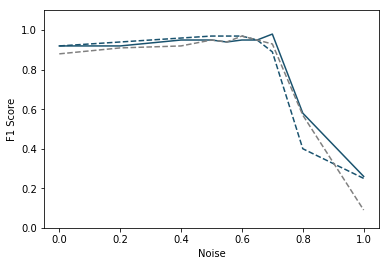

In [27]:
var = 'Noise'
df_f1, df_rec, df_prec = get_dfs(var, 'A', cluster_alg='', dist = 0.5, eps = 0.73)

get_graph(df_rec, var, ylabel='Recall', xlabel='Noise', ylim = (0,1.1)).savefig('graphs/rec_noiseA')
get_graph(df_prec, var, ylabel='Precision', xlabel='Noise', ylim = (0,1)).savefig('graphs/prec_noiseA')
get_graph(df_f1, var, ylabel='F1 Score', xlabel='Noise', ylim = (0,1.1)).savefig('graphs/f1_noiseA')

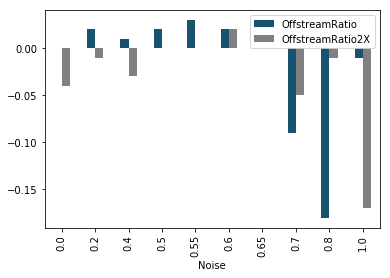

In [28]:
diff = pd.DataFrame()
diff['OffstreamRatio'] = df_f1['OffstreamRatio'] - df_f1['Weighted OffstreamRatio']
diff['OffstreamRatio2X'] = df_f1['OffstreamRatio2X'] - df_f1['Weighted OffstreamRatio']
diff.index = df_f1['Noise']
diff.plot(kind='bar', color=('#19526E', '0.5')).get_figure().savefig('graphs/diff_noise', bbox_inches='tight')

In [29]:
df_f1.iloc[:,[0,5,6,7,8,9,14,15,16,17]]

,Noise,time step,Ncluster,Noffstream,Weighted Noffstream,OffstreamRatio,Inter-Cluster-Change,Weighted Inter-Cluster-Change,Survivor-Distance-Change,Weighted Survivor-Distance-Change
0,0.00,100,0.47,0.91,0.93,0.92,0.18,0.35,0.07,0.09
1,0.20,100,0.29,0.69,0.73,0.94,0.24,0.19,0.09,0.11
2,0.40,100,0.46,0.81,0.86,0.96,0.19,0.17,0.07,0.08
3,0.50,100,0.76,0.88,0.87,0.97,0.15,0.33,0.07,0.06
4,0.55,100,0.77,0.85,0.85,0.97,0.32,0.27,0.18,0.20
5,0.60,100,0.80,0.87,0.89,0.97,0.34,0.23,0.12,0.18
6,0.65,100,0.81,0.97,0.98,0.95,0.29,0.32,0.28,0.26
7,0.70,100,0.75,0.90,0.98,0.89,0.35,0.36,0.42,0.29
8,0.80,100,0.65,0.46,0.65,0.40,0.21,0.35,0.25,0.05
9,1.00,100,0.16,0.16,0.18,0.25,0.25,0.10,0.23,0.23


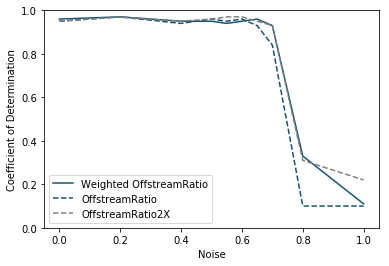

In [30]:
get_graph((get_coefDet(dist=0.5, eps=0.73).groupby('Noise', as_index=False).mean().round(2)), var = 'Noise', ylim = (0.0,1), xlabel='Noise', ylabel='Coefficient of Determination', legend=True).savefig('graphs/coefDet_noiseA')

In [31]:
get_coefDet(dist=0.5, eps=0.73).groupby('Noise', as_index=False).mean().iloc[:,[0,7,8,9,10,11]]

,Noise,Noffstream,Weighted Noffstream,OffstreamRatio,OffstreamRatio2X,Weighted OffstreamRatio
0,0.00,0.896319,0.916710,0.947315,0.953284,0.960298
1,0.20,0.729435,0.786178,0.968094,0.973608,0.966125
2,0.40,0.781713,0.833540,0.939913,0.953608,0.954343
3,0.50,0.843532,0.845043,0.955620,0.957513,0.950829
4,0.55,0.870412,0.868092,0.953083,0.971159,0.942294
5,0.60,0.858606,0.868868,0.957956,0.972945,0.950105
6,0.65,0.931219,0.952709,0.932811,0.952343,0.955490
7,0.70,0.866463,0.939185,0.840704,0.927070,0.934011
8,0.80,0.086693,0.362390,0.095687,0.306869,0.330593
9,1.00,0.167778,0.170337,0.103157,0.217137,0.109695


<h3>Cluster Algorithm</h3>

In [32]:
df_f1, df_rec, df_prec = get_dfs(['Cluster Alg', 'Eps'], 'A', cluster_alg='', dist=0.5, noise=0.8)
dbscan_max = df_f1[df_f1['Cluster Alg'] == 'DBSCAN']['Weighted OffstreamRatio'].idxmax()
coreq_max = df_f1[df_f1['Cluster Alg'] == 'COREQ']['Weighted OffstreamRatio'].idxmax()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

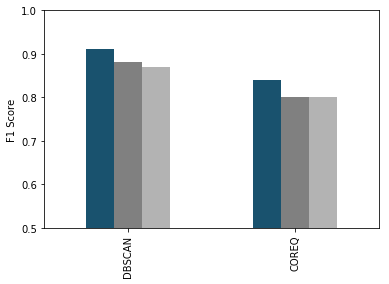

In [33]:
var = 'Cluster Alg'
#df_f1, df_rec, df_prec = get_dfs(var, 'A')

get_graph(df_rec.iloc[[dbscan_max, coreq_max],:], var, 'Recall', kind='bar', ylim = (0.5,1)).savefig('graphs/rec_clusterAlgA', bbox_inches='tight')
get_graph(df_prec.iloc[[dbscan_max, coreq_max],:], var, 'Precision', kind='bar', ylim = (0.5,1)).savefig('graphs/prec_clusterAlgA', bbox_inches='tight')
get_graph(df_f1.iloc[[dbscan_max, coreq_max],:], var, 'F1 Score', kind='bar', ylim = (0.5,1)).savefig('graphs/f1_clusterAlgA', bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

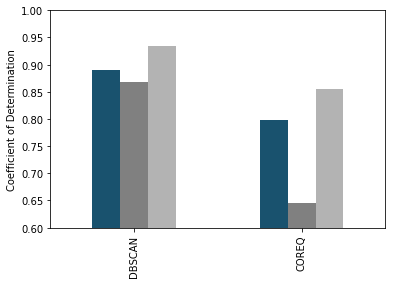

In [34]:
get_graph(get_coefDet(cluster_alg='', dist = 0.5, noise=0.8).groupby(['Cluster Alg', 'Eps'], as_index=False).mean()
          .iloc[[dbscan_max, coreq_max],:], var, ylabel='Coefficient of Determination', kind = 'bar', ylim=(0.6, 1)).savefig('graphs/coefDet_Alg', bbox_inches='tight')

In [35]:
get_coefDet(cluster_alg='', dist = 0.5, noise=0.8).groupby(['Cluster Alg', 'Eps'], as_index=False).mean().iloc[[dbscan_max, coreq_max],:].drop(['Window','time step', 'Threshold'], axis=1)

,Cluster Alg,Eps,Noise,type B CorrCoef,Ncluster,Noffstream,Weighted Noffstream,OffstreamRatio,OffstreamRatio2X,Weighted OffstreamRatio,Inter-Cluster Distance,Weighted Inter-Cluster Distance,Inter-Cluster-Change,Weighted Inter-Cluster-Change,Survivor-Distance-Change,Weighted Survivor-Distance-Change,ChenMax,ChenMean,ChenSum,corrnorm
18,DBSCAN,0.80,0.8,0.5,0.863913,0.626681,0.639869,0.867693,0.934223,0.889774,0.007186,0.173340,0.284890,0.803894,0.541267,0.127997,NaN,NaN,NaN,NaN
8,COREQ,0.55,0.8,0.5,0.743151,0.685640,0.820327,0.644540,0.854224,0.797276,0.024660,0.026973,0.360868,0.190108,0.338330,0.144313,NaN,NaN,NaN,NaN


<h3>Epsilon</h3>

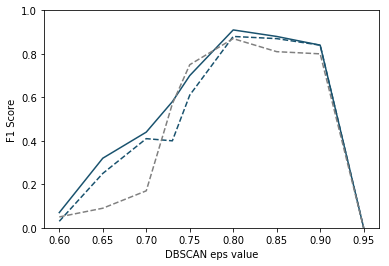

In [36]:
var = 'Eps'
df_f1, df_rec, df_prec = get_dfs(var, 'A', noise=0.8, dist = 0.5)
get_graph(df_rec, var, 'Recall', xlabel='DBSCAN eps value', ylim=(0.0,1.1)).savefig('graphs/rec_epsA')
get_graph(df_prec, var, 'Precision', xlabel='DBSCAN eps value',ylim=(0.0,1)).savefig('graphs/prec_epsA')
get_graph(df_f1, var, 'F1 Score',xlabel='DBSCAN eps value', ylim=(0.0,1)).savefig('graphs/f1_epsA')

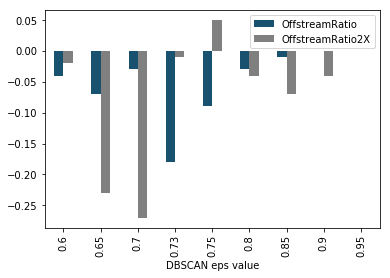

In [37]:
diff = pd.DataFrame()
diff['OffstreamRatio'] = df_f1['OffstreamRatio'] - df_f1['Weighted OffstreamRatio']
diff['OffstreamRatio2X'] = df_f1['OffstreamRatio2X'] - df_f1['Weighted OffstreamRatio']
diff.index = df_f1['Eps']
diff.index.rename('DBSCAN eps value', inplace = True)
diff.plot(kind='bar', color=('#19526E', '0.5')).get_figure().savefig('graphs/diff_eps', bbox_inches='tight')

In [38]:
diff

,OffstreamRatio,OffstreamRatio2X
DBSCAN eps value,,
0.60,-0.04,-0.02
0.65,-0.07,-0.23
0.70,-0.03,-0.27
0.73,-0.18,-0.01
0.75,-0.09,0.05
0.80,-0.03,-0.04
0.85,-0.01,-0.07
0.90,0.00,-0.04
0.95,0.00,0.00


In [39]:
df_f1.iloc[:,[0,7,8,9, 10, 11]]

,Eps,Noffstream,Weighted Noffstream,OffstreamRatio,OffstreamRatio2X,Weighted OffstreamRatio
0,0.60,0.02,0.05,0.03,0.05,0.07
1,0.65,0.15,0.25,0.25,0.09,0.32
2,0.70,0.42,0.43,0.41,0.17,0.44
3,0.73,0.46,0.65,0.40,0.57,0.58
4,0.75,0.70,0.77,0.61,0.75,0.70
5,0.80,0.58,0.59,0.88,0.87,0.91
6,0.85,0.67,0.68,0.87,0.81,0.88
7,0.90,0.69,0.69,0.84,0.80,0.84
8,0.95,0.00,0.00,0.00,0.00,0.00


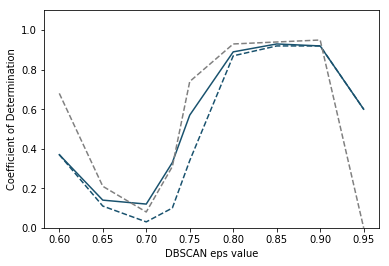

In [40]:
get_graph(get_coefDet(dist = 0.5, noise = 0.8).groupby(['Eps'], as_index=False).mean().round(2), var, 'Coefficient of Determination', xlabel='DBSCAN eps value', ylim=(0.0, 1.1)).savefig('graphs/coefDet_epsA')

In [41]:
get_coefDet(dist = 0.5, noise = 0.8).groupby(['Eps'], as_index=False).mean().round(2).drop(['time step', 'Window'], axis=1)

,Eps,Noise,Threshold,type B CorrCoef,Ncluster,Noffstream,Weighted Noffstream,OffstreamRatio,OffstreamRatio2X,Weighted OffstreamRatio,Inter-Cluster Distance,Weighted Inter-Cluster Distance,Inter-Cluster-Change,Weighted Inter-Cluster-Change,Survivor-Distance-Change,Weighted Survivor-Distance-Change,ChenMax,ChenMean,ChenSum,corrnorm
0,0.60,0.8,1.75,0.5,0.03,0.41,0.39,0.37,0.68,0.37,0.05,0.05,0.27,0.27,0.27,0.27,NaN,NaN,NaN,NaN
1,0.65,0.8,1.75,0.5,0.00,0.22,0.24,0.11,0.21,0.14,0.06,0.04,0.27,0.24,0.27,0.27,NaN,NaN,NaN,NaN
2,0.70,0.8,1.75,0.5,0.01,0.04,0.13,0.03,0.08,0.12,0.04,0.01,0.28,0.10,0.25,0.25,NaN,NaN,NaN,NaN
3,0.73,0.8,1.75,0.5,0.16,0.09,0.36,0.10,0.31,0.33,0.03,0.01,0.28,0.09,0.21,0.20,0.07,0.0,0.01,0.24
4,0.75,0.8,1.75,0.5,0.41,0.40,0.64,0.34,0.74,0.57,0.02,0.05,0.29,0.14,0.15,0.14,NaN,NaN,NaN,NaN
5,0.80,0.8,1.75,0.5,0.86,0.63,0.64,0.87,0.93,0.89,0.01,0.17,0.28,0.80,0.54,0.13,NaN,NaN,NaN,NaN
6,0.85,0.8,1.75,0.5,0.72,0.83,0.84,0.92,0.94,0.93,0.00,0.43,0.45,0.91,0.01,0.25,NaN,NaN,NaN,NaN
7,0.90,0.8,1.75,0.5,0.34,0.89,0.89,0.92,0.95,0.92,0.00,0.58,0.53,0.92,0.00,0.35,NaN,NaN,NaN,NaN
8,0.95,0.8,1.75,0.5,0.25,0.60,0.60,0.60,0.00,0.60,0.08,0.07,0.10,0.10,0.00,0.00,NaN,NaN,NaN,NaN


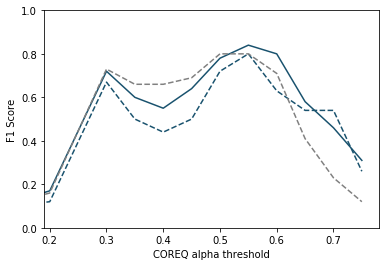

In [42]:
#dist 0.5
var = 'Eps'
alg = 'COREQ'
df_f1, df_rec, df_prec = get_dfs([var, 'Cluster Alg'], 'A', cluster_alg='COREQ', dist = 0.5, noise= 0.8)
get_graph(df_rec[df_rec['Cluster Alg']==alg], var, 'Recall',xlabel='COREQ alpha threshold',  ylim=(0.0,1), xlim=(0.19, 0.78)).savefig('graphs/rec_epsA_BlockCorr')
get_graph(df_prec[df_prec['Cluster Alg']==alg], var, 'Precision',xlabel='COREQ alpha threshold', ylim=(0.0,1), xlim=(0.19, 0.78)).savefig('graphs/prec_epsA_BlockCorr')
get_graph(df_f1[df_f1['Cluster Alg']==alg], var, 'F1 Score', xlabel='COREQ alpha threshold', ylim=(0.0, 1), xlim=(0.19, 0.78)).savefig('graphs/f1_epsA_BlockCorr')

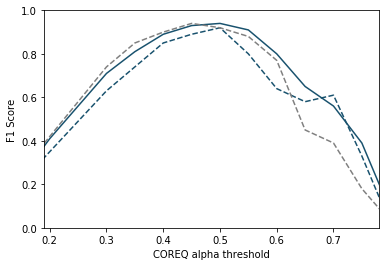

In [43]:
#dist 0.1
var = 'Eps'
alg = 'COREQ'
df_f1, df_rec, df_prec = get_dfs([var, 'Cluster Alg'], 'A', cluster_alg='COREQ', dist = 0.1, noise= 0.8)
get_graph(df_rec[df_rec['Cluster Alg']==alg], var, 'Recall',xlabel='COREQ alpha threshold',  ylim=(0.0,1), xlim=(0.19, 0.78)).savefig('graphs/rec_epsA_BlockCorrd1')
get_graph(df_prec[df_prec['Cluster Alg']==alg], var, 'Precision',xlabel='COREQ alpha threshold', ylim=(0.0,1), xlim=(0.19, 0.78)).savefig('graphs/prec_epsA_BlockCorrd1')
get_graph(df_f1[df_f1['Cluster Alg']==alg], var, 'F1 Score', xlabel='COREQ alpha threshold', ylim=(0.0, 1), xlim=(0.19, 0.78)).savefig('graphs/f1_epsA_BlockCorrd1')

In [44]:
df_f1.drop(['Window', 'time step', 'Threshold'], axis=1)

,Eps,Cluster Alg,Noise,type B CorrCoef,Ncluster,Noffstream,Weighted Noffstream,OffstreamRatio,OffstreamRatio2X,Weighted OffstreamRatio,Inter-Cluster Distance,Weighted Inter-Cluster Distance,Inter-Cluster-Change,Weighted Inter-Cluster-Change,Survivor-Distance-Change,Weighted Survivor-Distance-Change,ChenMax,ChenMean,ChenSum,corrnorm
0,0.10,COREQ,0.8,0.1,0.05,0.04,0.04,0.07,0.10,0.06,0.09,0.04,0.13,0.11,0.00,0.00,NaN,NaN,NaN,NaN
1,0.20,COREQ,0.8,0.1,0.09,0.37,0.42,0.35,0.42,0.41,0.05,0.11,0.21,0.14,0.00,0.00,NaN,NaN,NaN,NaN
2,0.30,COREQ,0.8,0.1,0.46,0.55,0.61,0.63,0.74,0.71,0.07,0.49,0.23,0.28,0.19,0.16,NaN,NaN,NaN,NaN
3,0.35,COREQ,0.8,0.1,0.65,0.70,0.76,0.74,0.85,0.81,0.05,0.62,0.34,0.39,0.22,0.23,NaN,NaN,NaN,NaN
4,0.40,COREQ,0.8,0.1,0.70,0.81,0.88,0.85,0.90,0.89,0.06,0.71,0.50,0.46,0.20,0.34,NaN,NaN,NaN,NaN
5,0.45,COREQ,0.8,0.1,0.74,0.89,0.92,0.89,0.94,0.93,0.07,0.69,0.53,0.55,0.26,0.37,NaN,NaN,NaN,NaN
6,0.50,COREQ,0.8,0.1,0.78,0.91,0.95,0.92,0.92,0.94,0.06,0.64,0.52,0.57,0.50,0.42,NaN,NaN,NaN,NaN
7,0.55,COREQ,0.8,0.1,0.81,0.84,0.92,0.80,0.88,0.91,0.06,0.62,0.57,0.58,0.62,0.59,NaN,NaN,NaN,NaN
8,0.60,COREQ,0.8,0.1,0.79,0.70,0.85,0.64,0.77,0.80,0.08,0.64,0.62,0.59,0.28,0.12,NaN,NaN,NaN,NaN
9,0.65,COREQ,0.8,0.1,0.74,0.60,0.69,0.58,0.45,0.65,0.07,0.60,0.66,0.55,0.61,0.43,NaN,NaN,NaN,NaN


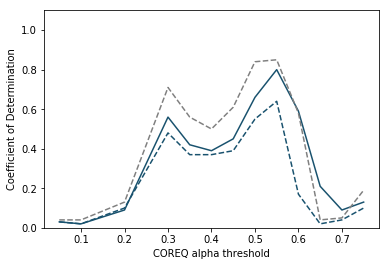

In [46]:
get_graph(get_coefDet(cluster_alg = 'COREQ', dist = 0.5, noise = 0.8).groupby(['Eps'], as_index=False).mean().round(2), var, 'Coefficient of Determination', xlabel='COREQ alpha threshold', ylim=(0.0, 1.1)).savefig('graphs/coefDet_alpha')

<h3>Distance Change</h3>

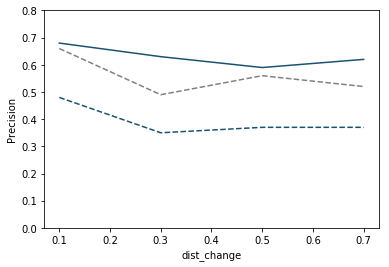

In [47]:
var = 'type B CorrCoef'
df_f1, df_rec, df_prec = get_dfs(var, 'A', eps = 0.73, noise = 0.8)

get_graph(df_prec, var, 'Precision', xlabel='dist_change', ylim = (0, 0.8)).savefig('graphs/prec_corrCoefA')
#get_graph(df_rec, var, 'Recall', xlabel='dist_change', ylim = (0, 1)).savefig('graphs/rec_corrCoefA')
#get_graph(df_f1, var, 'F1 Score', xlabel='dist_change', ylim = (0, 0.8)).savefig('graphs/f1_corrCoefA')

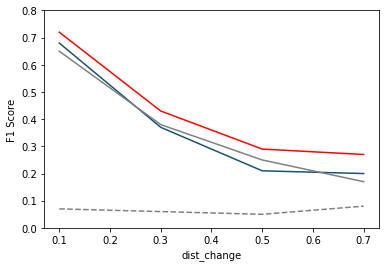

In [48]:
var = 'type B CorrCoef'
cn_f1 = competitor_f1A[competitor_f1A['Noise']== 0.8].groupby(var, as_index=False).mean().round(2)
df_f1, df_rec, df_prec = get_dfs(var, 'A', eps = 0.73, noise = 0.8)
get_graph_B(df_rec, var, 'Recall',xlabel='dist_change', ylim = (0, 0.8)).savefig('graphs/rec_corrCoefA_bscores')
get_graph_B(df_prec, var, 'Precision',xlabel='dist_change', ylim = (0, 0.8)).savefig('graphs/prec_corrCoefA_bscores')
get_graph_B(df_f1, var, 'F1 Score', xlabel='dist_change',ylim = (0, 0.8), competitor=cn_f1).savefig('graphs/f1_corrCoefA_bscores')

In [49]:
df_f1

,type B CorrCoef,Noise,Eps,Threshold,Window,time step,Ncluster,Noffstream,Weighted Noffstream,OffstreamRatio,...,Inter-Cluster Distance,Weighted Inter-Cluster Distance,Inter-Cluster-Change,Weighted Inter-Cluster-Change,Survivor-Distance-Change,Weighted Survivor-Distance-Change,ChenMax,ChenMean,ChenSum,corrnorm
0,0.1,0.8,0.73,1.75,100,100,0.71,0.57,0.74,0.53,...,0.07,0.49,0.68,0.56,0.65,0.07,0.06,0.38,0.48,0.72
1,0.3,0.8,0.73,1.75,100,100,0.57,0.40,0.59,0.38,...,0.07,0.22,0.37,0.23,0.38,0.06,0.10,0.21,0.23,0.43
2,0.5,0.8,0.73,1.75,100,100,0.65,0.46,0.65,0.40,...,0.06,0.32,0.21,0.35,0.25,0.05,0.15,0.23,0.37,0.29
3,0.7,0.8,0.73,1.75,100,100,0.49,0.27,0.45,0.39,...,0.04,0.18,0.20,0.07,0.17,0.08,0.10,0.10,0.22,0.27


<h3>Threshold</h3>

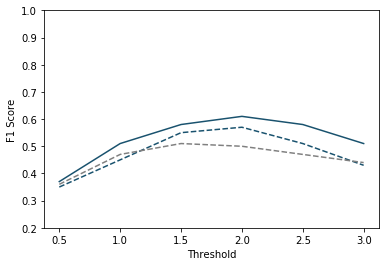

In [50]:
var = 'Threshold'
df_f1, df_rec, df_prec = get_dfs(var, 'A', dist=0.5, noise=0.8)
get_graph(df_rec, var, 'Recall', xlabel='Threshold', ylim=(0.2,1)).savefig('graphs/rec_thresholdA')
get_graph(df_prec, var, 'Precision', xlabel='Threshold', ylim=(0.2,1)).savefig('graphs/prec_thresholdA')
get_graph(df_f1, var, 'F1 Score', xlabel='Threshold', ylim=(0.2,1)).savefig('graphs/f1_thresholdA')

#plt.savefig('graphs/f1_thresholdA')

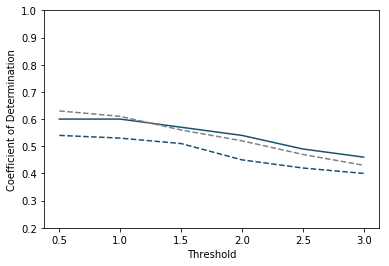

In [51]:
get_graph(get_coefDet(dist=0.5, noise=0.8).groupby(['Threshold'], as_index=False).mean().round(2), var, 'Coefficient of Determination',xlabel='Threshold', ylim=(0.2, 1)).savefig('graphs/coefDet_th')

In [52]:
get_coefDet(dist=0.5, noise=0.8).groupby(['Threshold'], as_index=False).mean().round(2).drop(['Window', 'time step', 'Eps'], axis=1)

,Threshold,Noise,type B CorrCoef,Ncluster,Noffstream,Weighted Noffstream,OffstreamRatio,OffstreamRatio2X,Weighted OffstreamRatio,Inter-Cluster Distance,Weighted Inter-Cluster Distance,Inter-Cluster-Change,Weighted Inter-Cluster-Change,Survivor-Distance-Change,Weighted Survivor-Distance-Change,ChenMax,ChenMean,ChenSum,corrnorm
0,0.5,0.8,0.5,0.28,0.55,0.62,0.54,0.63,0.60,0.09,0.21,0.19,0.42,0.09,0.17,0.4,0.0,0.00,0.11
1,1.0,0.8,0.5,0.31,0.54,0.61,0.53,0.61,0.60,0.04,0.20,0.36,0.45,0.21,0.26,0.0,0.0,0.01,0.30
2,1.5,0.8,0.5,0.34,0.49,0.56,0.51,0.56,0.57,0.03,0.17,0.36,0.41,0.23,0.24,0.0,0.0,0.02,0.30
3,2.0,0.8,0.5,0.32,0.44,0.50,0.45,0.52,0.54,0.01,0.14,0.34,0.39,0.22,0.21,0.0,0.0,0.02,0.27
4,2.5,0.8,0.5,0.32,0.37,0.45,0.42,0.47,0.49,0.01,0.13,0.32,0.37,0.21,0.19,0.0,0.0,0.01,0.26
5,3.0,0.8,0.5,0.28,0.34,0.42,0.40,0.43,0.46,0.01,0.10,0.29,0.34,0.19,0.17,0.0,0.0,0.00,0.22


<h2>Type B Error</h2>

[12.0, 3.0]


,i,t,corr_coef,c,time
0,709,A,0.0,0.8,2000-01-03 11:05:00
1,1207,A,0.0,0.8,2000-01-05 04:35:00
2,1890,A,0.0,0.8,2000-01-07 13:30:00
3,2158,A,0.0,0.8,2000-01-08 11:50:00
4,4561,B,0.7,0.8,2000-01-16 20:05:00
5,5833,B,0.0,0.8,2000-01-21 06:05:00
6,6689,B,0.7,0.8,2000-01-24 05:25:00
7,6948,B,0.0,0.8,2000-01-25 03:00:00


<Figure size 720x288 with 0 Axes>

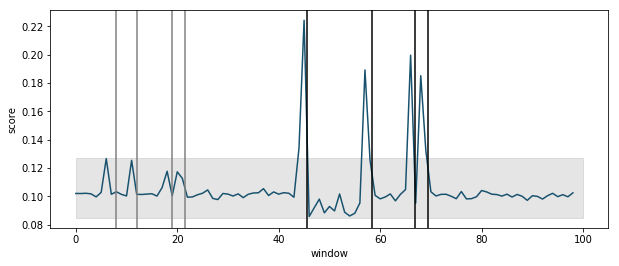

In [61]:
icc = pd.read_csv(path_to_evaluationFiles + 'icc.csv', index_col=0)
std = np.std(icc['Inter-Cluster-Change']) + np.mean(icc['Inter-Cluster-Change'])
neg_std =  np.mean(icc['Inter-Cluster-Change']) - np.std(icc['Inter-Cluster-Change'])

plt.gcf().clear()
fig, ax = plt.subplots()
#plt.figure(figsize=(15,5))

plt.plot(icc.index, 'Inter-Cluster-Change', data=icc,  color='#19526E')
ax.fill([0,100, 100, 0],[std, std, neg_std, neg_std],alpha=0.1, color='black')
plt.xlabel('window')
plt.ylabel('score')
plt.axvline(7.9, color = '0.5')
plt.axvline(12, color = '0.5')
plt.axvline(18.9, color = '0.5')
plt.axvline(21.6, color = '0.5')
plt.axvline(45.6, color = 'black')
plt.axvline(58.3, color = 'black')
plt.axvline(66.9, color = 'black')
plt.axvline(69.5, color = 'black')

# Get current size
fig_size = plt.rcParams["figure.figsize"]
  
# Set figure width to 12 and height to 9
fig_size[0] = 12
fig_size[1] = 3
plt.rcParams["figure.figsize"] = fig_size
print(plt.rcParams["figure.figsize"])
plt.savefig('graphs/icc', bbox_inches='tight')

#reset figsize
fig_size[0] = 6
fig_size[1] = 4
plt.rcParams["figure.figsize"] = fig_size

change_points_filename = '..\\data\\artificial\\noise0.8_dist0.7_4.h5'
change_points_file = pd.HDFStore(change_points_filename)
change_points = change_points_file['change_points']
change_points

<h3>Distance Change</h3>

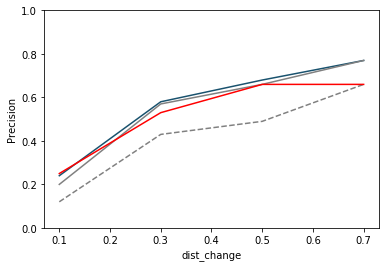

In [62]:
var = 'type B CorrCoef'

cn_f1 = competitor_f1B[competitor_f1B['Noise']== 0.8].groupby(var, as_index=False).mean().round(2)
cn_rec = competitor_recB[competitor_recB['Noise']== 0.8].groupby(var, as_index=False).mean().round(2)
cn_prec = competitor_precB[competitor_precB['Noise']== 0.8].groupby(var, as_index=False).mean().round(2)

df_f1, df_rec, df_prec = get_dfs(var, 'B', eps = 0.73, noise = 0.8)
get_graph_B(df_rec, var, 'Recall', xlabel='dist_change', ylim=(0, 1), competitor=cn_rec).savefig('graphs/rec_corrCoefB')
get_graph_B(df_prec, var, 'Precision', xlabel='dist_change', ylim=(0, 1), competitor=cn_prec).savefig('graphs/prec_corrCoefB')
#get_graph_B(df_f1, var, 'F1 Score', xlabel='dist_change', ylim=(0.0, 1), competitor=cn_f1).savefig('graphs/f1_corrCoefB')

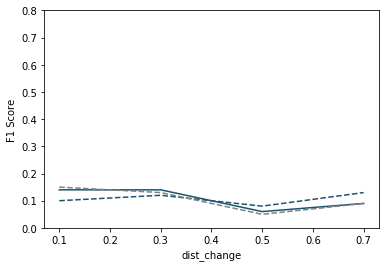

In [63]:
var = 'type B CorrCoef'
df_f1, df_rec, df_prec = get_dfs(var, 'B', eps = 0.73, noise = 0.8)
get_graph(df_rec, var, 'Recall', xlabel='dist_change', ylim=(0.0, 0.8)).savefig('graphs/rec_corrCoefB_scoresA')
get_graph(df_prec, var, 'Precision', xlabel='dist_change', ylim=(0.0, 0.8)).savefig('graphs/prec_corrCoefB_scoresA')
get_graph(df_f1, var, 'F1 Score', xlabel='dist_change', ylim=(0.0, 0.8)).savefig('graphs/f1_corrCoefB_scoresA')

In [64]:
df_f1

,type B CorrCoef,Noise,Eps,Threshold,Window,time step,Ncluster,Noffstream,Weighted Noffstream,OffstreamRatio,...,Inter-Cluster Distance,Weighted Inter-Cluster Distance,Inter-Cluster-Change,Weighted Inter-Cluster-Change,Survivor-Distance-Change,Weighted Survivor-Distance-Change,ChenMax,ChenMean,ChenSum,corrnorm
0,0.1,0.8,0.73,1.75,100,100,0.11,0.12,0.17,0.10,...,0.05,0.11,0.28,0.18,0.22,0.14,0.21,0.14,0.09,0.28
1,0.3,0.8,0.73,1.75,100,100,0.13,0.11,0.12,0.12,...,0.11,0.13,0.63,0.15,0.61,0.44,0.06,0.06,0.07,0.60
2,0.5,0.8,0.73,1.75,100,100,0.12,0.04,0.04,0.08,...,0.23,0.13,0.66,0.27,0.64,0.46,0.00,0.10,0.10,0.69
3,0.7,0.8,0.73,1.75,100,100,0.14,0.12,0.11,0.13,...,0.24,0.16,0.81,0.00,0.80,0.65,0.00,0.13,0.06,0.71


<h3>Noise</h3>

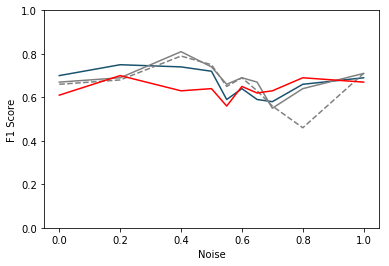

In [67]:
var = 'Noise'
cn_f1 = competitor_f1B[competitor_f1B['type B CorrCoef']== 0.5].groupby(var, as_index=False).mean().round(2)
cn_rec = competitor_recB[competitor_recB['type B CorrCoef']== 0.5].groupby(var, as_index=False).mean().round(2)
cn_prec = competitor_precB[competitor_precB['type B CorrCoef']== 0.5].groupby(var, as_index=False).mean().round(2)

df_f1, df_rec, df_prec = get_dfs(var, 'B', dist = 0.5, eps = 0.73)
get_graph_B(df_rec, var, 'Recall', xlabel='Noise', ylim=(0.0, 1), competitor = cn_rec).savefig('graphs/rec_noiseB')
get_graph_B(df_prec, var, 'Precision',xlabel='Noise', ylim=(0.0, 1), competitor = cn_prec).savefig('graphs/prec_noiseB')
get_graph_B(df_f1, var, 'F1 Score', xlabel='Noise', ylim=(0.0, 1), competitor = cn_f1).savefig('graphs/f1_noiseB')

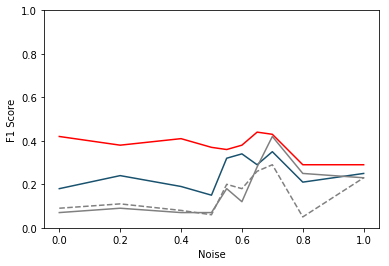

In [68]:
var = 'Noise'
cn_f1 = competitor_f1A[competitor_f1A['type B CorrCoef']== 0.5].groupby(var, as_index=False).mean().round(2)
cn_rec = competitor_recA[competitor_recA['type B CorrCoef']== 0.5].groupby(var, as_index=False).mean().round(2)
cn_prec = competitor_precA[competitor_precA['type B CorrCoef']== 0.5].groupby(var, as_index=False).mean().round(2)

df_f1, df_rec, df_prec = get_dfs(var, 'A', dist = 0.5, eps = 0.73)
get_graph_B(df_rec, var, 'Recall', xlabel='Noise', ylim=(0.0, 1), competitor = cn_rec).savefig('graphs/rec_noiseB')
get_graph_B(df_prec, var, 'Precision',xlabel='Noise', ylim=(0.0, 1), competitor = cn_prec).savefig('graphs/prec_noiseB')
get_graph_B(df_f1, var, 'F1 Score', xlabel='Noise', ylim=(0.0, 1), competitor = cn_f1).savefig('graphs/f1_noiseB')

In [69]:
df_f1

,Noise,Eps,Threshold,type B CorrCoef,Window,time step,Ncluster,Noffstream,Weighted Noffstream,OffstreamRatio,...,Inter-Cluster Distance,Weighted Inter-Cluster Distance,Inter-Cluster-Change,Weighted Inter-Cluster-Change,Survivor-Distance-Change,Weighted Survivor-Distance-Change,ChenMax,ChenMean,ChenSum,corrnorm
0,0.00,0.73,1.75,0.5,100,100,0.47,0.91,0.93,0.92,...,0.02,0.33,0.18,0.35,0.07,0.09,0.58,0.70,0.68,0.42
1,0.20,0.73,1.75,0.5,100,100,0.29,0.69,0.73,0.94,...,0.07,0.23,0.24,0.19,0.09,0.11,0.80,0.85,0.59,0.38
2,0.40,0.73,1.75,0.5,100,100,0.46,0.81,0.86,0.96,...,0.07,0.41,0.19,0.17,0.07,0.08,0.75,0.91,0.50,0.41
3,0.50,0.73,1.75,0.5,100,100,0.76,0.88,0.87,0.97,...,0.03,0.76,0.15,0.33,0.07,0.06,0.70,0.83,0.45,0.37
4,0.55,0.73,1.75,0.5,100,100,0.77,0.85,0.85,0.97,...,0.05,0.70,0.32,0.27,0.18,0.20,0.61,0.75,0.38,0.36
5,0.60,0.73,1.75,0.5,100,100,0.80,0.87,0.89,0.97,...,0.02,0.66,0.34,0.23,0.12,0.18,0.38,0.70,0.34,0.38
6,0.65,0.73,1.75,0.5,100,100,0.81,0.97,0.98,0.95,...,0.04,0.47,0.29,0.32,0.28,0.26,0.19,0.53,0.25,0.44
7,0.70,0.73,1.75,0.5,100,100,0.75,0.90,0.98,0.89,...,0.09,0.30,0.35,0.36,0.42,0.29,0.20,0.50,0.35,0.43
8,0.80,0.73,1.75,0.5,100,100,0.65,0.46,0.65,0.40,...,0.06,0.32,0.21,0.35,0.25,0.05,0.15,0.23,0.37,0.29
9,1.00,0.73,1.75,0.5,100,100,0.16,0.16,0.18,0.25,...,0.02,0.04,0.25,0.10,0.23,0.23,0.01,0.15,0.12,0.29


<h3>Eps</h3>

c:\users\alexa\appdata\local\conda\conda\envs\thesis\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
c:\users\alexa\appdata\local\conda\conda\envs\thesis\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\alexa\appdata\local\conda\conda\envs\thesis\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


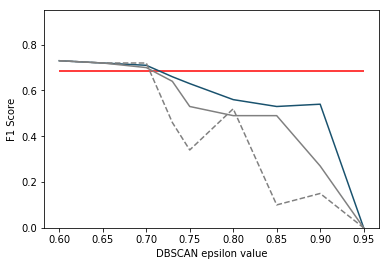

In [71]:
var = 'Eps'
cn_recB = competitor_recB[competitor_recB['Noise']== 0.8][competitor_recB['type B CorrCoef']== 0.5]['corrnorm'].mean()
cn_precB = competitor_precB[competitor_precB['Noise']== 0.8][competitor_precB['type B CorrCoef']== 0.5]['corrnorm'].mean()
cn_f1B = competitor_f1B[competitor_f1B['Noise']== 0.8][competitor_f1B['type B CorrCoef']== 0.5]['corrnorm'].mean()

df_f1, df_rec, df_prec = get_dfs(var, 'B', dist=0.5, noise=0.8)
get_graph_B(df_rec, var, 'Recall', xlabel='DBSCAN epsilon value', ylim=(0.0, 0.95),hline = [cn_recB, 0.6, 0.95]).savefig('graphs/rec_epsB')
get_graph_B(df_prec, var, 'Precision', xlabel='DBSCAN epsilon value', ylim=(0.0, 0.95),hline = [cn_precB, 0.6, 0.95]).savefig('graphs/prec_epsB')
get_graph_B(df_f1, var, 'F1 Score', xlabel='DBSCAN epsilon value', ylim=(0.0, 0.95),hline = [cn_f1B, 0.6, 0.95]).savefig('graphs/f1_epsB')

c:\users\alexa\appdata\local\conda\conda\envs\thesis\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
c:\users\alexa\appdata\local\conda\conda\envs\thesis\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\alexa\appdata\local\conda\conda\envs\thesis\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


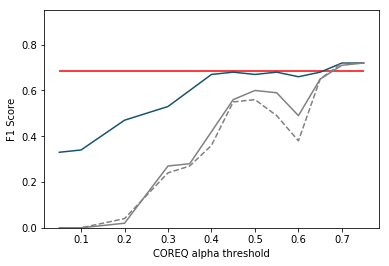

In [73]:
var = 'Eps'
cn_recB = competitor_recB[competitor_recB['Noise']== 0.8][competitor_recB['type B CorrCoef']== 0.5]['corrnorm'].mean()
cn_precB = competitor_precB[competitor_precB['Noise']== 0.8][competitor_precB['type B CorrCoef']== 0.5]['corrnorm'].mean()
cn_f1B = competitor_f1B[competitor_f1B['Noise']== 0.8][competitor_f1B['type B CorrCoef']== 0.5]['corrnorm'].mean()

df_f1, df_rec, df_prec = get_dfs(var, 'B', cluster_alg='COREQ',dist = 0.5)
get_graph_B(df_rec, var, 'Recall', xlabel='COREQ alpha threshold', ylim=(0.0, 0.95), hline =[cn_recB, 0.05, 0.75]).savefig('graphs/rec_epsB_BlockCorr')
get_graph_B(df_prec, var, 'Precision', xlabel='COREQ alpha threshold', ylim=(0.0, 0.95), hline=[cn_precB, 0.05, 0.75]).savefig('graphs/prec_epsB_BlockCorr')
get_graph_B(df_f1, var, 'F1 Score',xlabel='COREQ alpha threshold', ylim=(0.0, 0.95), hline=[cn_f1B, 0.05, 0.75]).savefig('graphs/f1_epsB_BlockCorr')

<h3>Threshold </h3>

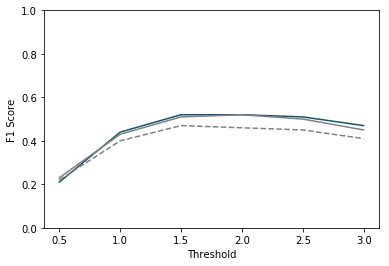

In [74]:
var = 'Threshold'
df_f1, df_rec, df_prec = get_dfs(var, 'B')

get_graph_B(df_prec, var, 'Precision', 'Threshold', ylim=(0, 1)).savefig('graphs/prec_thB', bbox_inches='tight')
get_graph_B(df_rec, var, 'Recall', 'Threshold', ylim=(0, 1)).savefig('graphs/rec_thB', bbox_inches='tight')
get_graph_B(df_f1, var, 'F1 Score', 'Threshold', ylim=(0, 1)).savefig('graphs/f1_thB', bbox_inches='tight')
#plt.xticks([0.2, 0.3, 0.4, 0.5, 0.6])

In [75]:
df_f1

,Threshold,Noise,Eps,type B CorrCoef,Window,time step,Ncluster,Noffstream,Weighted Noffstream,OffstreamRatio,...,Inter-Cluster Distance,Weighted Inter-Cluster Distance,Inter-Cluster-Change,Weighted Inter-Cluster-Change,Survivor-Distance-Change,Weighted Survivor-Distance-Change,ChenMax,ChenMean,ChenSum,corrnorm
0,0.5,0.66,0.75,0.32,100,100,0.10,0.12,0.12,0.10,...,0.13,0.13,0.21,0.20,0.23,0.22,0.11,0.10,0.11,0.24
1,1.0,0.66,0.75,0.32,100,100,0.10,0.11,0.11,0.09,...,0.18,0.14,0.44,0.27,0.43,0.40,0.10,0.09,0.11,0.44
2,1.5,0.66,0.75,0.32,100,100,0.09,0.11,0.11,0.08,...,0.17,0.13,0.52,0.30,0.51,0.47,0.10,0.10,0.09,0.45
3,2.0,0.66,0.75,0.32,100,100,0.08,0.10,0.10,0.07,...,0.13,0.10,0.52,0.26,0.52,0.46,0.09,0.10,0.06,0.45
4,2.5,0.66,0.75,0.32,100,100,0.07,0.09,0.09,0.07,...,0.10,0.09,0.51,0.24,0.50,0.45,0.08,0.08,0.05,0.44
5,3.0,0.66,0.75,0.32,100,100,0.06,0.08,0.09,0.06,...,0.07,0.07,0.47,0.21,0.45,0.41,0.07,0.05,0.05,0.40
